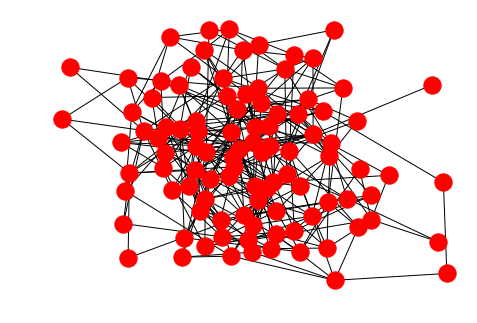

In [12]:
####### define a function for constructing an Erdos_Renyi graph with N node and conection probabilty p 
import networkx as nx
import numpy as np
def Graph(N,p):
    #return nx.barabasi_albert_graph(N, m, seed=None)
    #return nx.newman_watts_strogatz_graph(N, k, p, seed=None)
    return nx.erdos_renyi_graph(N,p, seed=None)

#pos=nx.circular_layout(Graph(20,.5))
nx.draw(Graph(100,.06))    ####just example

In [5]:
######function for constructing Adjacancy matrix(0,1) from an Erdos Renyi graph which is produced before
import scipy as sp
import networkx as nx
import random

def Adj(G):
    A=nx.to_numpy_matrix(G)
    A=np.array(A) 
    return A

print(Adj(Graph(5,.5)))   ###just example

[[0. 1. 1. 0. 1.]
 [1. 0. 0. 1. 1.]
 [1. 0. 0. 1. 0.]
 [0. 1. 1. 0. 1.]
 [1. 1. 0. 1. 0.]]


In [6]:
####a function to create the Adjacancy matrix for friendship and hostility(1,-1) relation between nodes####
def link(C):
    for i in range(len(C)):
        for j in range(i):
            if C[i][j]==1:
                x=random.choice([0,1])
                if x==1:
                    C[i][j]=C[j][i]=1
                else:
                    C[i][j]=C[j][i]=-1
    return C


#print(Adj(Graph(5,.5)))
print(link(Adj(Graph(5,.5))))   #####example######


[[ 0.  0.  0.  0. -1.]
 [ 0.  0. -1.  0. -1.]
 [ 0. -1.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.]
 [-1. -1. -1.  0.  0.]]


In [7]:
#########################defining the different type of pairs densities######################
#####################Node[i] is amount of node i in the network which is 1(blue) or 0(white) 

def density_a(a,Node):  ###### density of a type#############
    Sum=0.0
    for i in range(len(a)):
        for j in range(i):
            if a[i][j]==-1 and Node[i]==0 and Node[j]==0:
                Sum+=1
                
    return Sum
#########################################################
    
def density_e(a, Node):   #######density of e type
    Sum=0.0
    for i in range(len(a)):
        for j in range(i):
            if (a[i][j]==1 and  Node[i]==1 and Node[j]==0) or (a[i][j]==1 and  Node[i]==0 and Node[j]==1)  :
                Sum+=1
    return Sum
##########################################################

def density_c(a, Node):   ##### c typpe############
    Sum=0.0
    for i in range(len(a)):
        for j in range(i):
            if a[i][j]==-1 and Node[i]==1 and Node[j]==1:
                Sum+=1
    return Sum
##############################################################
def density_b(a, Node):   ####### b type################
    Sum=0.0
    for i in range(len(a)):
        for j in range(i):
            if a[i][j]==1 and Node[i]==0 and Node[j]==0:
                Sum+=1
                
    return Sum
##############################################################  
def density_f(a, Node):    ####### f type
    Sum=0.0
    for i in range(len(a)):
        for j in range(i):
            if (a[i][j]==-1 and  Node[i]==1 and Node[j]==0) or (a[i][j]==-1 and  Node[i]==0 and Node[j]==1) :
                Sum+=1

    return Sum
    
#######################################################################
def density_d(a, Node):     ######## d type
    Sum=0.0
    for i in range(len(a)):
        for j in range(i):
            if a[i][j]==1 and Node[i]==1 and Node[j]==1:
                Sum+=1
                
    return Sum


In [11]:
###################an example to see that our pairs densities work properly or not??
import random
import numpy as np
Node=np.zeros((6),dtype=int)
for i in range(6):
    x=random.uniform(0,1)
    if x<.5:
        Node[i]=1
    else:
        Node[i]=0
print(Node)      
c=link(Adj(Graph(6,.7)))
print(c)
print("D_a", density_a(c, Node))
print("D_e", density_e(c, Node))
print("D_c", density_c(c, Node))

print("D_b", density_b(c, Node))
print("D_f", density_f(c, Node))
print("D_d", density_d(c, Node))


[0 1 1 1 1 0]
[[ 0.  1.  1.  1.  0.  0.]
 [ 1.  0. -1.  1. -1.  1.]
 [ 1. -1.  0.  1.  1.  1.]
 [ 1.  1.  1.  0.  1.  1.]
 [ 0. -1.  1.  1.  0.  1.]
 [ 0.  1.  1.  1.  1.  0.]]
D_a 0.0
D_e 7.0
D_c 2.0
D_b 0.0
D_f 0.0
D_d 4.0


In [27]:
#################constants problem

N=100
probability=.06    ### edge probabilty connection 
p=.8    ##### the probabilty which we update nodes and links with it

mu=probability*N  ####### the mean-degree of network
L=(mu*N)/2.0   ##### NUMBER OF LINKS
iteration=int(120*mu*N)  ##############60 step monte carlo
ensemble=1

############## mean_degree=N*p#################

0


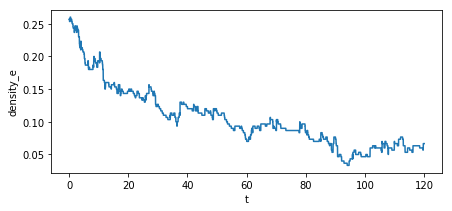

In [28]:
import numpy as np
import random
import matplotlib.pyplot as plt
import networkx as nx

Adjacancy=np.zeros((N,N),dtype=int)

#############list for different typs of densities a,e,c, b, f, d
D_a=np.zeros((ensemble,iteration),dtype=float)
D_e=np.zeros((ensemble,iteration), dtype=float)
D_c=np.zeros((ensemble,iteration),dtype=float)

D_b=np.zeros((ensemble,iteration),dtype=float)
D_f=np.zeros((ensemble,iteration),dtype=float)
D_d=np.zeros((ensemble,iteration),dtype=float)
##################################################

Node =np.zeros((N),dtype=int)


for ens in range(ensemble):  ###### loop of ensemble
    print(ens)
   
    Adjacancy=link(Adj(Graph(N,probability)))   ##### matrix of friendship and hostility (1,-1)
    for i in range(N):
        Node[i]=random.choice([0,1]) ######### amount of each node
    
    for it in range(iteration):   ########step monte carlo loop
        ###############first we choose an edge randomly
    
        I=random.randint(0,N-1)
        J=random.randint(0,N-1)
        
        ###############update rules###################
        if Adjacancy[I][J]==-1 and Node[I]==0 and Node[J]==0:  ###type a
           
            r1=random.uniform(0,1)
            if r1<p:
                Adjacancy[I][J]=1
                
            else:
                x=random.choice([0,1])
                if x==0:
                    Node[I]=1
                else:
                    Node[J]=1
                        
        elif Adjacancy[I][J]==1 and Node[I]==1 and Node[J]==0:  #####type e
            r1=random.uniform(0,1)
            if r1<p:
                Adjacancy[I][J]=-1
                
            elif r1>p and r1< p+(1-p)/2.0:
                Node[I]=0
     
            else:
                Node[J]=1

                   
        elif Adjacancy[I][J]==1 and Node[I]==0 and Node[J]==1:   ######type e
            r1=random.uniform(0,1)
            if r1<p:
                Adjacancy[I][J]=-1
                
            elif r1>=p and r1<=p+(1-p)/2.0:
                Node[I]=1
     
            else:
                Node[J]=0
                    
                        
        elif  Adjacancy[I][J]==-1 and Node[I]==1 and Node[J]==1:   ##### type c
            
            r1=random.uniform(0,1)
            if r1<p:
                Adjacancy[I][J]=1
                
            else:
                x=random.choice([0,1])
                if x==0:
                    Node[I]=0
                else:
                    Node[J]=0
                        
                        
        else:
            pass
                    
                
        #D_a[ens][it]=density_a(Adjacancy, Node)
        D_e[ens][it]=density_e(Adjacancy,Node)
        #D_c[ens][it]=density_c(Adjacancy, Node)
    
        #D_b[ens][it]=density_b(Adjacancy, Node)
        #D_f[ens][it]=density_f(Adjacancy, Node)
        #D_d[ens][it]=density_d(Adjacancy, Node)
        
D_e=D_e/L     
np.savetxt("Density_e.txt", D_e)
d_e=np.loadtxt("Density_e.txt", dtype=float)  
tt=np.arange(0, iteration, 1)
tt=tt/(mu*N)
plt.figure(figsize=(7,3))
plt.plot(tt, d_e)
plt.xlabel("t")
plt.ylabel("density_e")
plt.show()
   
    

    

np.savetxt("D_e.txt",D_e)
np.savetxt("D_b.txt", D_b)                
np.savetxt("D_b.txt", D_b)                
np.savetxt("D_b.txt", D_b)                
np.savetxt("D_b.txt", D_b)                
np.savetxt("D_b.txt", D_b)                

 

In [16]:

p=.8
print(p+p/2)

0
0
2
2
1
2
3
2
3
2
1.2000000000000002
